# Image Compression using FFT 



<br><br>Siddhant Rathi | 190003061 | AA202N - Astronomical Techniques <br><br>

<br><br>

### Introduction

In this project, we try to compress an image to a lower memory size by removing lower-amplitude frequency components from its 2D fourier transform. This compression technique is lossy, but we can set the compression threshold such that there is no apparent quality distortion.<br><br>



### Process

• Take a 2D Fourier Transform of the image, say ```F2``` <br>
• Sort ```F2``` and set an amplitude threshold ```TH``` which will include only the largest x% entries <br>  
• Convert all entries in ```F2``` which are smaller than ```TH``` to 0. (lossy) <br>
• Take the Inverse 2D Fourier Transform of the resultant matrix <br><br><br>



### The 2D Fourier Transform 

The 2D Fourier Transform for an aperiodic, discrete signal in time-domain is given as:

$$ F[k,l] = \frac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f[m,n] e^{-2 \pi j (\frac{k}{M}m + \frac{l}{N}n)} $$

This can be achieved by using our usual 1D Fourier Transform on the signal twice, once for both the variables $m$ and $n$

<br><br><br><br> The Inverse 2D Fourier Transform will be:

$$ f[m,n] = \sum_{k=0}^{M-1} \sum_{l=0}^{N-1} F[k,l] e^{2 \pi j (\frac{k}{M}m + \frac{l}{N}n)} $$

This, again, can be obtained by using the inverse 1D Fourier Transform on the signal twice, once for both the variables $u$ and $v$

<br><br>
<img src = "fft2.png"  width = "5000" height = "1000" align = "center">
<br><br><hr style="height:1px;border-width:0;color:black;background-color:black">

__Importing the required libraries__

In [2]:
%reset -f
import matplotlib.pyplot as plt           #for plotting 
import numpy as np                        #array manipulation
from matplotlib.image import imread       #Reads an image from a file into an array.
import os                                 #Helps to interact with the file system, mainly to open the image file
import copy                               #To create deep copies of Complex arrays

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


__Reading the Image file__

In [3]:
A = imread(os.path.relpath('jupiter.jpg'))          #Reading the image file into an array 'A'
B = np.mean(A, axis = -1, dtype = 'complex_')    #Converting the image to 1 color channel

print(A.shape, "\n", "\n")
print(A, "\n", "\n")
print(B.shape, "\n", "\n")
print(B)

(1024, 1280, 3) 
 

[[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]] 
 

(1024, 1280) 
 

[[2.+0.j 2.+0.j 2.+0.j ... 2.+0.j 2.+0.j 2.+0.j]
 [2.+0.j 2.+0.j 2.+0.j ... 2.+0.j 2.+0.j 2.+0.j]
 [2.+0.j 2.+0.j 2.+0.j ... 2.+0.j 2.+0.j 2.+0.j]
 ...
 [2.+0.j 2.+0.j 2.+0.j ... 2.+0.j 2.+0.j 2.+0.j]
 [2.+0.j 2.+0.j 2.+0.j ... 2.+0.j 2.+0.j 2.+0.j]
 [2.+0.j 2.+0.j 2.+0.j ... 2.+0.j 2.+0.j 2.+0.j]]


__Plotting the Images__

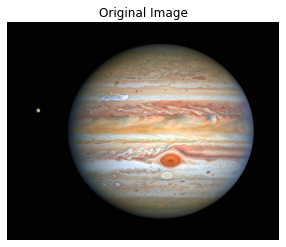

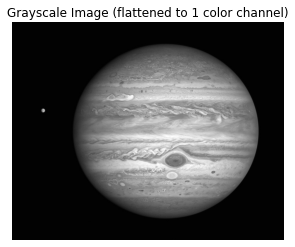

In [4]:
plt.figure(1)
plt.imshow(A)
plt.axis('off')
plt.title('Original Image')

plt.figure(2)
plt.imshow(B.real, cmap='gray')    #converting to real for plotting
plt.axis('off')                    #remove axes
plt.title('Grayscale Image (flattened to 1 color channel)')

plt.show()

__Creating Functions for 2D Fourier Transform and its Inverse__

In [5]:
def fft2(arrin):
    arr = arrin.copy()                     #keeping input intact
    for j in range(arr.shape[1]):
        arr[:,j] = np.fft.fft(arr[:,j])      #along the columns
    for i in range(arr.shape[0]):
        arr[i,:] = np.fft.fft(arr[i,:])      #along the rows
    return arr

def ifft2(arrin):
    arr = arrin.copy()                       #keeping input intact
    for j in range(arr.shape[1]):
        arr[:,j] = np.fft.ifft(arr[:,j])     #along the columns
    for i in range(Atlow.shape[0]):
        arr[i,:] = np.fft.ifft(arr[i,:])     #along the columns
    return arr

__Taking 2D Fourier Transform of the Image__

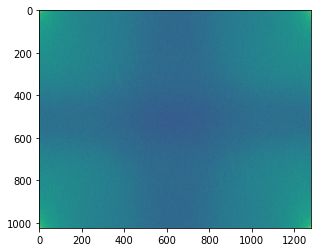

In [6]:
Bfft = fft2(B)      

plt.figure()
plt.imshow(20*np.log(np.abs(Bfft)))       #Plotting the magnitude of FFT2
plt.show()

__Sorting, Setting Threshold, Filtering, and Plotting__

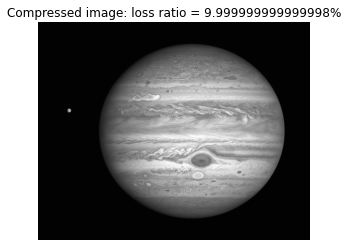

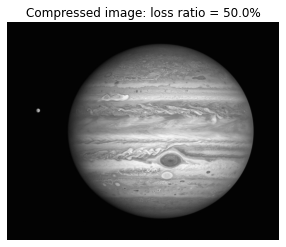

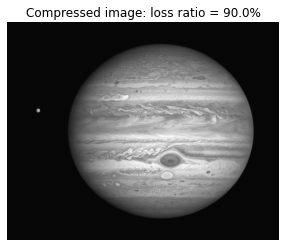

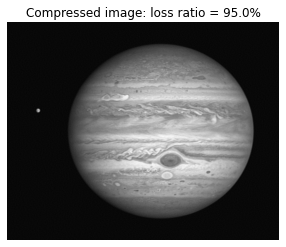

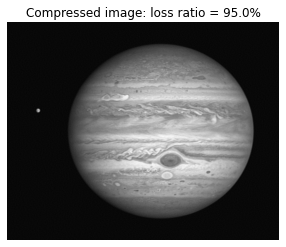

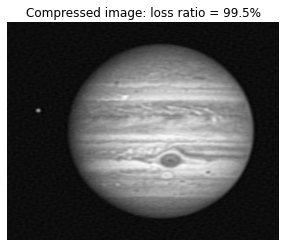

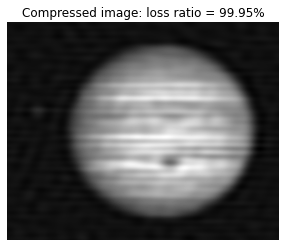

In [7]:
Btsort = np.sort(np.abs(Bfft.reshape(-1)))                     #Sorting Bfft (reshaped to 1D) by magnitude 


for ratio in (0.9 ,0.5 ,0.1 ,0.05 ,0.05 ,0.005, 0.0005):       #Looping over different comression rates 
  
    threshInd = int(np.floor((1-ratio)*len(Btsort)))
    thresh = Btsort[threshInd]                                 #Setting threshold amplitude based on ratio    
    ind = np.abs(Bfft)>thresh                                  #Boolean array to filter out low amplitude components 
    Atlow = Bfft*ind                                           #Filtered fourier transform array 

    Acomp = ifft2(Atlow)                                       #Compressed array

    plt.figure()                                               #Plotting the compressed images
    plt.imshow(Acomp.real,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: loss ratio = ' + str(100*(1-ratio)) + '%')
    
    #plt.savefig('Compressed image loss ratio = ' + str(100*(1-ratio)) + '%.png')


plt.show()

<br>
There's no considerable visual degradation even till 90% loss ratio. The image compression procedure seems effective. 

<br><hr style="height:1px;border-width:0;color:black;background-color:black">

### Color-channel-wise Compression

Now, we try applying the filtering from the grayscale threshold to all the three color-channels separately, then combining them into an image.
<br><br>

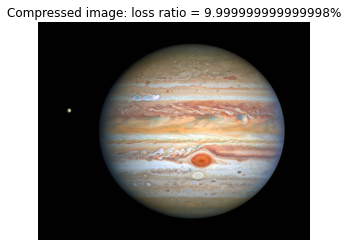

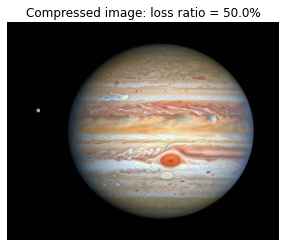

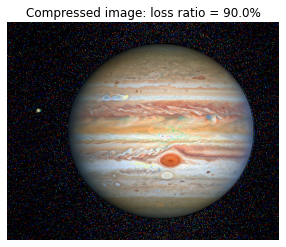

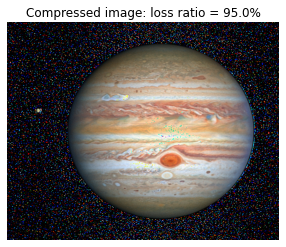

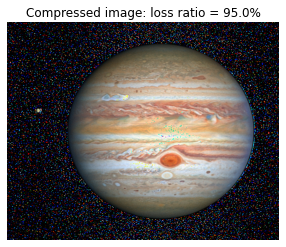

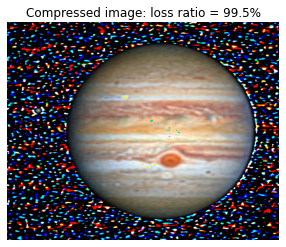

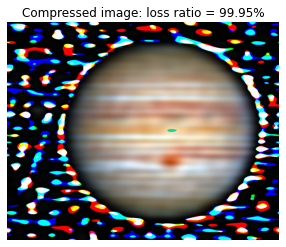

In [7]:
Acol = A.copy()                                           #Creating a copy of A 

Btsort = np.sort(np.abs(Bfft.reshape(-1)))      

rfft = np.fft.fft2(A[:,:,0])                              #Taking fourier transform of each color-channel individually
gfft = np.fft.fft2(A[:,:,1])
bfft = np.fft.fft2(A[:,:,2])


for ratio in (0.9 ,0.5 ,0.1 ,0.05 ,0.05 ,0.005, 0.0005):       
    
    threshInd = int(np.floor((1-ratio)*len(Btsort)))
    thresh = Btsort[threshInd]                  
    ind = np.abs(Bfft)>thresh                                                               

    rfftlow = rfft*ind                                    #Filtering each color-channel  
    gfftlow = gfft*ind
    bfftlow = bfft*ind
    
    Acol[:,:,0] = np.fft.ifft2(rfftlow).real              #Combining the color-channels into a single array    
    Acol[:,:,1] = np.fft.ifft2(gfftlow).real
    Acol[:,:,2] = np.fft.ifft2(bfftlow).real
    
    plt.figure()                                          #Plotting the final image
    plt.imshow(Acol)
    plt.axis('off')
    plt.title('Compressed image: loss ratio = ' + str(100*(1-ratio)) + '%')

    
    plt.savefig('Compressed image loss ratio = ' + str(100*(1-ratio)) + '%.png')


plt.show()

<br>
There's no considerable visual degradation till 50% loss ratio. Thereafter, there is a chromatic distortion. 

<br><hr style="height:1px;border-width:0;color:black;background-color:black">

### Color-channel-wise Compression, Separate Thresholds

Finally, we calculate a separate threshold for all the three color-channels, and then filter them using the respective threshold.
<br><br>

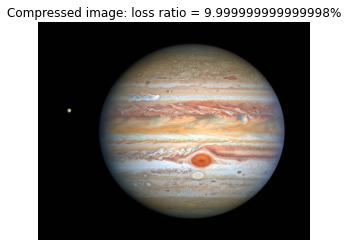

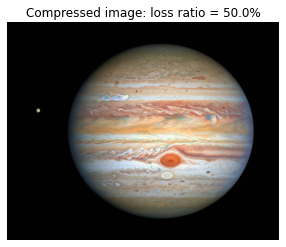

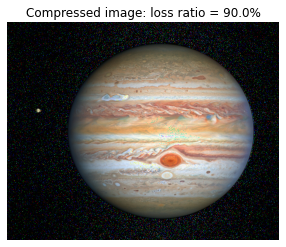

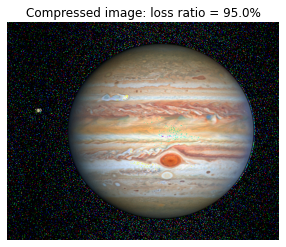

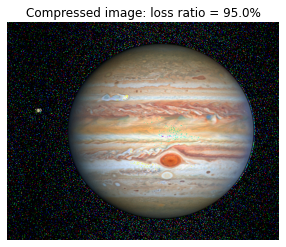

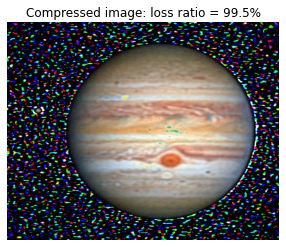

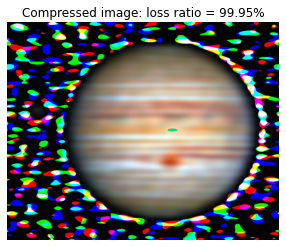

In [8]:
Acol = A.copy()

rfft = np.fft.fft2(A[:,:,0])                                     #Taking fourier transform of each color-channel individually
gfft = np.fft.fft2(A[:,:,1])
bfft = np.fft.fft2(A[:,:,2])

rfftsort = np.sort(np.abs(rfft.reshape(-1)))                     #Sorting the respective fourier transforms by magnitude 
gfftsort = np.sort(np.abs(gfft.reshape(-1)))
bfftsort = np.sort(np.abs(bfft.reshape(-1)))


for ratio in (0.9 ,0.5 ,0.1 ,0.05 ,0.05 ,0.005, 0.0005):
    
    threshr = rfftsort[int(np.floor((1-ratio)*len(rfftsort)))]   #Setting threshold amplitude based on ratio
    threshg = gfftsort[int(np.floor((1-ratio)*len(gfftsort)))]
    threshb = bfftsort[int(np.floor((1-ratio)*len(bfftsort)))]
    
    indr = np.abs(rfft)>threshr                                  #Boolean array to filter out low amplitude components 
    indg = np.abs(gfft)>threshg
    indb = np.abs(bfft)>threshb
    
    rfftlow = rfft*indr                                          #Filtered fourier transform array 
    gfftlow = gfft*indg
    bfftlow = bfft*indb
    
    Acol[:,:,0] = np.fft.ifft2(rfftlow).real                     #Combining the color-channels into a single array
    Acol[:,:,1] = np.fft.ifft2(gfftlow).real
    Acol[:,:,2] = np.fft.ifft2(bfftlow).real
    
    plt.figure()                                                 #Plotting the final image
    plt.imshow(Acol)
    plt.axis('off')
    plt.title('Compressed image: loss ratio = ' + str(100*(1-ratio)) + '%')
    

<br>
Here, again, there's no considerable visual degradation till 50% loss ratio. Thereafter, we see a chromatic distortion. 

<br>

__Just For Fun__

When you don't reset the variables and/or pass by reference..

<img src = "lassan.png"  width = "500" height = "5000" align = "center">
<img src = "me.png"  width = "500" height = "5000" align = "center">
<img src = "me2.png"  width = "500" height = "5000" align = "center">
<img src = "me3.png"  width = "500" height = "5000" align = "center">
<img src = "sag.png"  width = "500" height = "5000" align = "center">
<img src = "sag1.png"  width = "500" height = "5000" align = "center">
<img src = "sog.png"  width = "500" height = "5000" align = "center">
<img src = "vin.png"  width = "500" height = "5000" align = "center">

<br><br>

## Thank You

<br><hr style="height:1px;border-width:0;color:black;background-color:black"><hr style="height:1px;border-width:0;color:black;background-color:black">

<p style="font-size:12px;">Resources referred to:<br>    
•http://fourier.eng.hmc.edu/e101/lectures/Image_Processing/node6.html <br>
•https://www.youtube.com/watch?v=gGEBUdM0PVc <br>
•https://www.youtube.com/watch?v=3gAZ0U66AEA&t=609s <br>
•https://www.youtube.com/watch?v=3gAZ0U66AEA&t=638s <br>
•https://esahubble.org/images/archive/top100/ <br>
</p>